# Linear Regressions in Python

In machine learning, regression problems aren't as popular as classification problems, but they are interesting nonetheless.

A regression problem is one that requires the model to return a value, such a dollar amount or an amount of apples forecast in the fall harvest. As such, they cover a wide variety of cases, and they make use of simple techniques like ordinary least-squares and more sophisticated ensemble techniques that use boosting and bagging.

There's more than one way of running linear regressions in Python, and once you know the basics, the more advanced methods are within easy reach!

1. **Getting demo data from sklearn.datasets** scikit-learn comes with demo datasets. We'll load one to get started.
2. **Using numpy to implement a linear regression** `numpy` is a library for matrix operations. We'll use it to implement a linear regression model.
3. **Looking at the DataFrame object in pandas** the `pandas` library gives the option of using `DataFrame` objects, which you may find nicer than `numpy` arrays. `pandas` also offers nice visualizations.
4. **Nicer model output in statsmodel** if you are used to other statistical packages out there, you may find `statsmodel` useful. It gives more detailed model metrics. We'll run a linear regression in it to show off the library.
5. **Running regressions quickly in scikit-learn** scikit-learn is a very nice statistical learning library; however, it's a bit *pythonic* and terse compared to `pandas` and `statsmodel`. We'll go through three regression examples.

I've put a lot of links in the text so that you can quickly view the documentation of the functions used. These links will look like this: [`sklearn.linear_model.LinearRegression()`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

Don't forget to browse the documentation of these fine packages! It is really well done! Definitely have a look at [the large amount of code examples by the scikit-learn contributors](http://scikit-learn.org/stable/auto_examples/index.html)!

## Import everything

To get started, we have to import all of the packages we're going to use. Here is the standard way of importing these libraries.

If you Google any of these, you can find information about them. For example, here is the [full list of classes](http://scikit-learn.org/stable/modules/classes.html) in scikit-learn. If there's something in there you find interesting, just import it and/or click on it to get more details.

In [1]:
# base python's random number library
import random

# get scikit-learn's datasets
from sklearn import datasets

# load various models from scikit-learn's library
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

# also get some metrics to try
from sklearn.metrics import r2_score

# numpy for working with matrices
import numpy as np

# matplotlib for graphs
import matplotlib.pyplot as plt

# pandas for experimenting with DataFrame objects a little
import pandas as pd

# a litle bit of statsmodel for nicer looking model output
import statsmodels.formula.api as sm

## Getting demo data from sklearn.datasets

The scikit-learn library comes pre-loaded with a few datasets. We'll use one of these to run our examples.

To load the Boston house prices, we make a call to the [`load_boston()`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html) function in the [`datasets`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets) class.

In [2]:
house_prices = datasets.load_boston()

There is some extra information embedded in the `datasets` dictionary object itself.

There are two ways of accessing it. You can access it as you access a property (`house_prices.data`) or as you access a dictionary (`house_prices["data"]`). *Please note that you're not guaranteed to have these two options with other datasets in Python.*

We'll use the dictionary method this time. You can see a dictionary's keys by printing its `.keys()`.

In [3]:
# View what's inside the dataset
print(house_prices.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR'])


You can access key values by indexing the key name, `dictionary["key_name"]`.

In [4]:
# Have a look at feature names
print(house_prices["feature_names"])

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


The [`type()`](https://docs.python.org/3/library/functions.html#type) base python function can tell you what type an object is. Here we just want to confirm that we are dealing with numpy matrices.

In [5]:
# See what type of data "data" and "target" are
print(type(house_prices["data"]))
print(type(house_prices["target"]))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


Finally, there is a lot of information in the `DESCR` key.

In [6]:
# Have a look at the DESCR
print(house_prices["DESCR"])

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

## Using numpy to implement a linear regression

The [`numpy`](https://docs.scipy.org/doc/) library is very popular since it upgrades Python into a scientific computing environment. You can do a lot with `numpy`, from implementing a simple linear regression model to a neural network.

Numpy also has the advantage of optimized matrix operations. If you can reformulate your program into a bunch of matrix operations, Numpy will use all of you computer's cores to perform the calculations very quickly. I have used Numpy to implement neural networks, and it ran reasonably fast. (No GPU support however!)

The most important data structure in numpy is the [numpy array](https://docs.scipy.org/doc/numpy-1.13.0/reference/arrays.html), which are vectors, matrices, or tensors depending on their dimensions. You can create new numpy arrays using [`numpy.array()`](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.array.html) or other functions like [`numpy.zeros()`](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.zeros.html) and [`numpy.ones()`](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.ones.html).

Here are the basics:

In [7]:
# In python you can create a nested list like this
python_list = [[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]]

# This list can be imported in Numpy using the numpy.array function
numpy_array = np.array(python_list)
print(numpy_array)

# Here are some important properties of the numpy array
print("shape: {0}".format(numpy_array.shape))
print("total number of elements (size): {0}".format(numpy_array.size))
print("data type (dtype): {0}".format(numpy_array.dtype))

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
shape: (4, 3)
total number of elements (size): 12
data type (dtype): int64


We will now jump to implementing a [linear regression](https://en.wikipedia.org/wiki/Linear_regression) in numpy. The linear regression model is a basic statistical model that "fits" the best line through the data, giving us an idea of what relationships exist between variables.

Below, $\theta$ signifies model parameters (including intercept), $X$ signifies input data (including intercept), and $y$ represents output data ($\hat{y}$ means estimated output data). When you see $X^T$ it means that the $X$ matrix is transposed.

You can find [other implementations in other languages](https://en.wikipedia.org/wiki/Linear_least_squares_%28mathematics%29#Example_implementation) on Wikipedia.

The linear regression model will predict data with a matrix multiplication like so

$$\hat{y} = X \theta$$

In order to train the parameters/coefficients $\theta$, we use the [normal equation](https://en.wikipedia.org/wiki/Linear_least_squares_%28mathematics%29#Computation)

$$\theta = (X^T X)^{-1} X^T y$$

Before we start though, we need to prepare our data. The two things we need to do are:
1. Add a column of 1s to the X data so that the model will run with an intercept term. An intercept term lets the linear regression shift all fitted lines up or down.
2. Reshape the y data into a 2D matrix since we'll be performing matrix operations on it. By default, scikit-learn stores the y data without a column dimension.

Do to all of this, we'll use a few useful `numpy` functions
* [`.shape()`](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.ndarray.shape.html) we used above to get an array's shape. If you run `X.shape[0]` you will get the number of rows in the `X` array.
* [`numpy.ones()`](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.ones.html) creates an array of 1s, which we'll use for our intercept term. The `ones()` function takes a shape argument to create an array of `(rows, columns)`.
* [`numpy.concatenate()`](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.concatenate.html) joins arrays together. By specifying `axis=1` you will join the arrays side-by-side.
* [`.reshape()`](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.ndarray.reshape.html) will reshape an array in-place. It's a very powerful function for rearranging your arrays in all sorts of ways. There is more information about it [here](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.reshape.html).

(I tend to prefer the in-place numpy functions, like `.reshape()` instead of `np.reshape()`. I'll stop making the distinction.)

In [8]:
# We need to prepare the data first by adding a column of ones for the intercept
# Then by concatenating this array of 1s with the data, we get a completed X array
X = np.concatenate((np.ones((house_prices["data"].shape[0], 1)), house_prices["data"]), axis=1)
print("First row of X\n{0}".format(X[0,:]))

# Our output data y is not the right shape to do matrix operations
# The reshape function can expand its column dimension (axis 1)
# When you set a dimension size to -1, numpy will guess its size
y = house_prices["target"].reshape(-1, 1)
print("First 10 rows of y\n{0}".format(y[0:10,:]))

First row of X
[  1.00000000e+00   6.32000000e-03   1.80000000e+01   2.31000000e+00
   0.00000000e+00   5.38000000e-01   6.57500000e+00   6.52000000e+01
   4.09000000e+00   1.00000000e+00   2.96000000e+02   1.53000000e+01
   3.96900000e+02   4.98000000e+00]
First 10 rows of y
[[ 24. ]
 [ 21.6]
 [ 34.7]
 [ 33.4]
 [ 36.2]
 [ 28.7]
 [ 22.9]
 [ 27.1]
 [ 16.5]
 [ 18.9]]


Now that the data is ready, it's pretty easy to estimate the model. As long as you know how to translate the math into numpy operations, it can all be done very quickly in a few lines of code.
* [`.transpose()`](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.transpose.html) will transpose an array in-place (without modifying the original array permanently)
* [`.dot()`](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.dot.html) calculates the dot product between two matrices; however, if Numpy is loaded you can use the `@` operator instead
* [`numpy.linalg.inv()`](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.linalg.inv.html) inverts an array, meaning that it finds $X^{-1}$
* [`numpy.sum()`](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.sum.html) sums an array completely. You can specify an `axis` if you want, to get a row or column sum.

I also use python's built-in [`zip()`](https://docs.python.org/3/library/functions.html#zip) function in the for loop. It lets me iterate through multiple iterables simultaneously.

I calculate the R^2 metric, also known as the [Coefficient of Determination](https://en.wikipedia.org/wiki/Coefficient_of_determination). Its formula is $R^2 = 1 - \frac{SS_{residuals}}{SS_{total}}$. `0.0` is bad, `1.0` is good.

In [9]:
# Calculate the coefficients
coefficients = np.linalg.inv(X.transpose() @ X) @ X.transpose() @ y

# Find the estimated target data, y-hat
predicted = X @ coefficients

# Calculate R^2 metric
ss_residual = np.sum((y - predicted)**2)
ss_total = np.sum((y - np.mean(y))**2)
r_squared = 1 - (ss_residual/ss_total)

# Print all of this nicely
print("Squared errors {:7.0f}".format(ss_residual))
print("R-squared      {:7.2f}".format(r_squared))
print("Estimated coefficients")
for param, name in zip(range(coefficients.shape[0]), ["intercept"]+list(house_prices["feature_names"])):
    print("{:10}: {:10.3f}".format(name, coefficients[param, 0]))

Squared errors   11080
R-squared         0.74
Estimated coefficients
intercept :     36.491
CRIM      :     -0.107
ZN        :      0.046
INDUS     :      0.021
CHAS      :      2.689
NOX       :    -17.796
RM        :      3.805
AGE       :      0.001
DIS       :     -1.476
RAD       :      0.306
TAX       :     -0.012
PTRATIO   :     -0.953
B         :      0.009
LSTAT     :     -0.525


If you look at the other regressions we run below, you'll see that the estimates all match. There's more than one way of getting to the same place in Python.

## Looking at the DataFrame object in pandas

The `pandas` library introduces [`DataFrame`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html) objects, which can be a bit friendlier to use than `numpy` matrices. Normally when working with matrices you either don't pay that much attention to what column is what, or you embed this information in a list or dictionary, like `house_prices["DESCR"]`.

In [10]:
# Here the data frame object is a matrix with named columns
# However, this will not include the median home prices, which is in ["target"]
df = pd.DataFrame(data=house_prices["data"], columns=house_prices["feature_names"])

Turns out these `DataFrame` objects are kind of neat. I did not realize these were available in python. Below I use [`.iloc[]`](https://pandas.pydata.org/pandas-docs/stable/indexing.html) to subset the data by row. (You don't need `.iloc()` or `.loc()` to select columns.)

In [11]:
# I'll only print the first few rows. It's a lot of data for printing in Jupyter.
df.iloc[:10,]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


With the data frame object and the pandas library, we can create a nice scatter matrix plot. It does take a bit of time to run though. The example below comes from the pandas documentation on [`scatter_matrix()`](https://pandas.pydata.org/pandas-docs/stable/visualization.html#visualization-scatter-matrix).

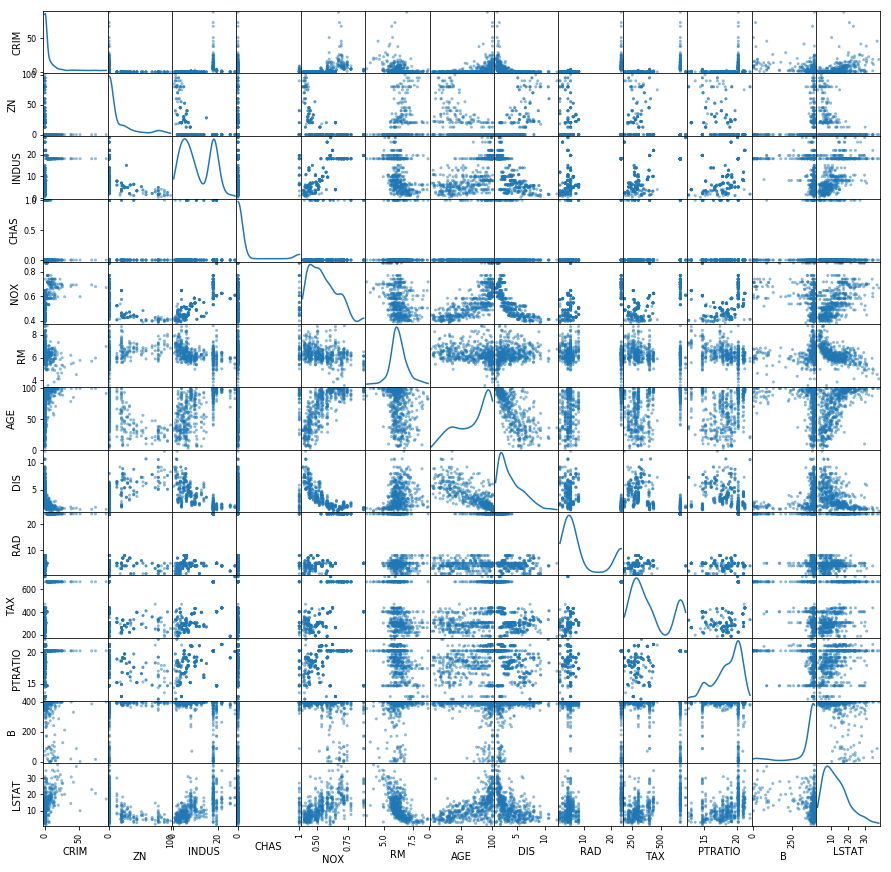

In [12]:
# The data frame can then use pandas scatter matrix plot
matrix_plot = pd.plotting.scatter_matrix(df, figsize=(15, 15), diagonal='kde')

# matplotlib display
plt.show()

## Nicer model output in statsmodel

If you're used to statistical modelling in R and other languages, you're used to getting a lot of summary statistics after running a model. You can get these by using the `statsmodel` package.

Before I do any of this, I have to merge my X and Y data together. There's a bit of a problem because the target data has no axis 1 dimension. I use [`expand_dims`](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.expand_dims.html) to fix this.

In [13]:
# X
print(house_prices["data"].shape)

# Y (axis 1 is empty)
print("{0}   <-- lacks a dimension size".format(house_prices["target"].shape))

# Expand axis 1
print("{0} <-- this is better".format(np.expand_dims(house_prices["target"], axis=1).shape))

# Now works
np.concatenate((house_prices["data"], np.expand_dims(house_prices["target"], axis=1)), axis=1).shape

(506, 13)
(506,)   <-- lacks a dimension size
(506, 1) <-- this is better


(506, 14)

In the case of the column names, an `.append()` will work.

In [14]:
# In the case of the column names, I have to do an np.append()
np.append(house_prices["feature_names"], "MEDV")

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='<U7')

In [15]:
# We are going to re-use the dataframe from before, but this time include "target"
df = pd.DataFrame(data=np.concatenate((house_prices["data"], np.expand_dims(house_prices["target"], axis=1)), axis=1), 
                                      columns=np.append(house_prices["feature_names"], "MEDV"))

# Now works
df.iloc[:10,]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


With that out of the way, we can now use the [`statsmodel`](http://www.statsmodels.org/stable/index.html) package. We'll try out the [`ols()`](www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLS.html) function.

In [16]:
# Note that the backslash lets me continue the string on another line
lm = sm.ols(formula="MEDV ~ CRIM + ZN + INDUS + CHAS + NOX + \
    RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT", data=df).fit()

In [17]:
print(lm.params)

Intercept    36.491103
CRIM         -0.107171
ZN            0.046395
INDUS         0.020860
CHAS          2.688561
NOX         -17.795759
RM            3.804752
AGE           0.000751
DIS          -1.475759
RAD           0.305655
TAX          -0.012329
PTRATIO      -0.953464
B             0.009393
LSTAT        -0.525467
dtype: float64


In [18]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Thu, 04 Jan 2018   Prob (F-statistic):          6.95e-135
Time:                        07:52:59   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4911      5.104      7.149      0.0

## Running regressions quickly in scikit-learn

### A simple LinearRegression()

#### Using a Numpy array

Let's run a [`LinearRegression()`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) on this data. I will do things the typical ML way quickly, and then I'll do a slightly longer example with pandas.

According to what we learned above, there is a numpy matrix for "data" and one for "target" (the median value of the homes). This makes things pretty easy to run.

In [19]:
# Create a new linear model object
lm = LinearRegression()

# Fit it
lm_fit = lm.fit(X=house_prices["data"], y=house_prices["target"])

# See coefficients
print(lm.coef_)

[ -1.07170557e-01   4.63952195e-02   2.08602395e-02   2.68856140e+00
  -1.77957587e+01   3.80475246e+00   7.51061703e-04  -1.47575880e+00
   3.05655038e-01  -1.23293463e-02  -9.53463555e-01   9.39251272e-03
  -5.25466633e-01]


The `coef_` array contains the coefficient estimates. The first element in the array is the estimated intercept parameter.

#### Using a pandas DataFrame in scikit-learn

It turns out that a pandas DataFrame object can be used in a scikit-learn model as well.

In [20]:
# Recall our merged DataFrame from the statsmodel example
df.iloc[:1,]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.09,1.0,296.0,15.3,396.9,4.98,24.0


The DataFrame above has both our X and y data. All we have to do is select the columns we want to use as X variables and select the column we want as our y variable.

Do note that you have to enclose multiple column labels in a nested list `[["a", "b", "c"]]`.

In [21]:
# Create a new linear model object
lm = LinearRegression()

# Fit it
lm_fit = lm.fit(
    X=df[["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"]], 
    y=df["MEDV"])

# See coefficients
print(lm.coef_)

[ -1.07170557e-01   4.63952195e-02   2.08602395e-02   2.68856140e+00
  -1.77957587e+01   3.80475246e+00   7.51061703e-04  -1.47575880e+00
   3.05655038e-01  -1.23293463e-02  -9.53463555e-01   9.39251272e-03
  -5.25466633e-01]


### Iterating through multiple regressions with a for-loop

You can also slice the input data by the column and feed it to the linear regression function. The example below runs `LinearRegression()` on each variable individually and graphs the results.

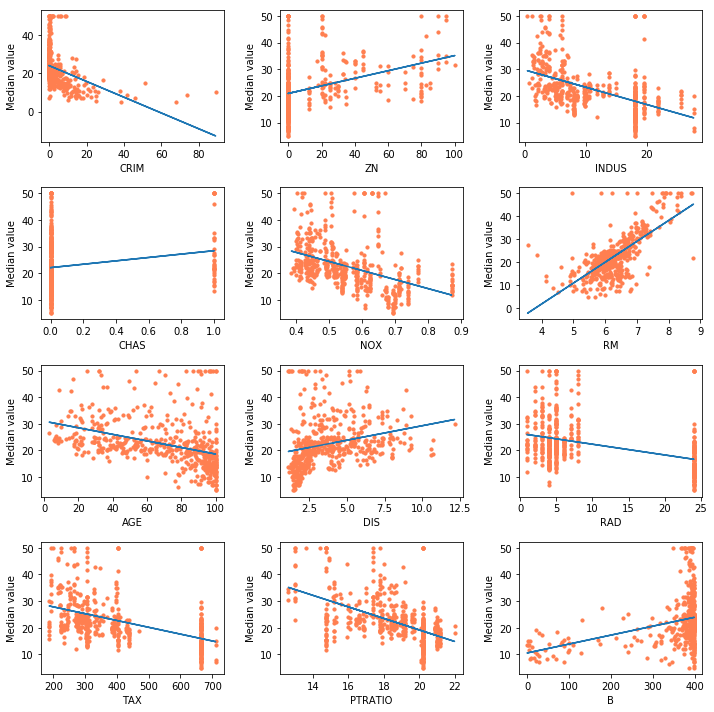

In [22]:
# You can create a linear regression object once and re-use it
# This might be risky with more sophisticated models though
lm = LinearRegression()

# It's necessary to enlarge the figure before the plotting starts
plt.figure(figsize=(10, 10))

# Generate all the subplots
for index_number in range(12):
    # Index to run
    ivar = index_number

    # Get its name
    ivar_name = house_prices["feature_names"][ivar]

    # Select the independant variable's data only
    ivar_data = np.expand_dims(house_prices["data"][:, ivar], axis=1)

    # Fit it
    lm_fit = lm.fit(X=ivar_data, y=house_prices["target"])

    # Get predictions
    lm_predict = lm.predict(X=ivar_data)

    # This assigns a subplot
    # The arguments are nrows, ncol, index (+1)
    plt.subplot(4, 3, index_number+1)
    
    # Scatter plot (the s= option sets the pointer size)
    plt.scatter(ivar_data, house_prices["target"], s=10, color="coral")
    
    # Line
    plt.plot(ivar_data, lm_predict)
    
    # Set labels
    plt.xlabel(ivar_name)
    plt.ylabel("Median value")

# Render
plt.tight_layout()
plt.show()

### Using multiple different models and comparing them

Scikit-learn is set up nicely to run many different at once and compare them. You can see a great example of this [on this page](http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html).

I'll switch over to a fake dataset I was inspired to create thanks to [this guide](http://scikit-learn.org/stable/auto_examples/ensemble/plot_adaboost_regression.html). It's a non-linear regression problem that should be the nightmare of all OLSs.

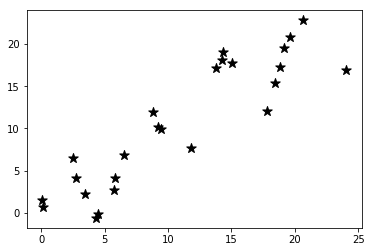

In [23]:
def generate_fake(difficulty=5.0, obs_range=25):
    X = np.random.uniform(low=0, high=obs_range, size=obs_range).reshape(-1,1)
    Y = (X + 0.1*X \
         - 0.01*X**2 \
         + difficulty*np.sin(X) \
         + np.random.uniform(-1, 1, X.shape)).ravel()
    return X, Y

X, Y = generate_fake()

plt.scatter(X, Y, color="k", marker="*", s=100)
plt.show()

Using the trusty `zip()` function, it's easy to run multiple models in succession. I'll try to explain a bit what I'm doing below.

I also use a lot of other functions, here are links to their documentation.
* [`.shape()`](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.ndarray.shape.html) is an extremely useful Numpy array property to check what size of array you're working with!
* [`.reshape()`](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.reshape.html) I use here to make sure my arrays don't have an empty dimension size, like `(10,)`
* [`linspace()`](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.linspace.html) creates an array with a series of regularly-spaced values, great for plotting a line in a graph
* I have a hard time with the `matplotlib` commands, so the best way for me is just to look at [examples](https://matplotlib.org/gallery/index.html)

Here are the regressors I use:
* [`LinearRegression()`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) is a basic model that "fits a line" through data.
* [`AdaBoostRegressor()`](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostRegressor.html) is a model that will 'boost' another model given to it. It runs the "weak" model multiple times to combat overfitting. On a model like OLS, this is mostly useless, but it does help a DecisionTreeRegressor to avoid overfitting.
* [`KNeighborsRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html) is a model that predicts data by imitating the `k` most similar points (the neighbors).
* [`RandomForestRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) first splits apart the data and runs separate regressions on each split, and it then "prunes" some of these splits to make the model work better on data it hasn't seen. RandomForests are very powerful, like neural networks, but they're a bit easier to interpret.

I should also mention that I use the [`r2_score()`](scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html) metric. You can find other metrics in the [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#regression-metrics) class to help you measure the performance of your models. These are good, but not as descriptive and friendly [as other statistical packages out there](www.statsmodels.org/); however, they're sufficient for machine learning.

R^2 score for OLS is 0.80761829194067
R^2 score for AdaBoost + OLS is 0.776294366173428
R^2 score for DecisionTreeRegressor is 1.0
R^2 score for AdaBoost + DecisionTree is 0.9849943426597259
R^2 score for Support Vector Regressor (rbf) is 0.5040048041465222
R^2 score for Random Forests is 0.9819734455576636


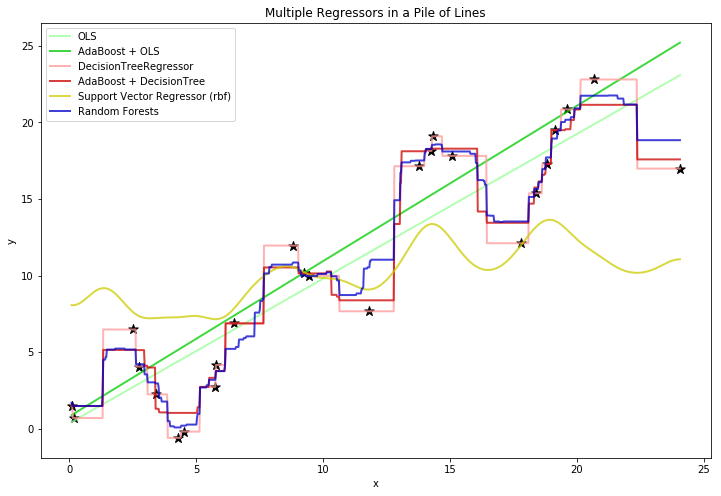

In [24]:
# Generate some uniform fake data for plotting results
fake_data = np.linspace(min(X), max(X), 1000).reshape(-1, 1)

# It's necessary to enlarge the figure before the plotting starts
plt.figure(figsize=(12, 8))

# Create a list of regressors
regressors = [LinearRegression(), 
              AdaBoostRegressor(LinearRegression(), n_estimators=100), 
              DecisionTreeRegressor(), 
              AdaBoostRegressor(n_estimators=100), 
              SVR(), 
              RandomForestRegressor(n_estimators=100, max_depth=5)]
              

# Give them names for the legend
regressor_names = ["OLS", "AdaBoost + OLS", "DecisionTreeRegressor", "AdaBoost + DecisionTree", "Support Vector Regressor (rbf)", "Random Forests"]

# Also give them colors
colors = ["#99ff99", "#00cc00", "#ff9999", "#cc0000", "#cccc00", "#0000cc"]

# Create the scatter plot now
plt.scatter(X, Y, color="k", marker="*", s=100)

# You can use the zip() function to iterate over multiple series
for regressor, name, color in zip(regressors, regressor_names, colors):
    # fit instance
    fit = regressor.fit(X=X, y=Y)
    # predict using instance
    fake_predict = regressor.predict(X=fake_data)
    # plot predictions
    plt.plot(fake_data, fake_predict, label=name, color=color, linewidth=2, alpha=0.75)
    # print R^2
    true_predict = regressor.predict(X=X)
    print("R^2 score for {0} is {1}".format(name, r2_score(Y, true_predict)))

# Set labels
plt.xlabel("x")
plt.ylabel("y")

# Title
plt.title("Multiple Regressors in a Pile of Lines")

# Legend
plt.legend()

# Render
plt.show()

How does this evolve as the data gets more and more non-linear? Here is how difficulty affects the data

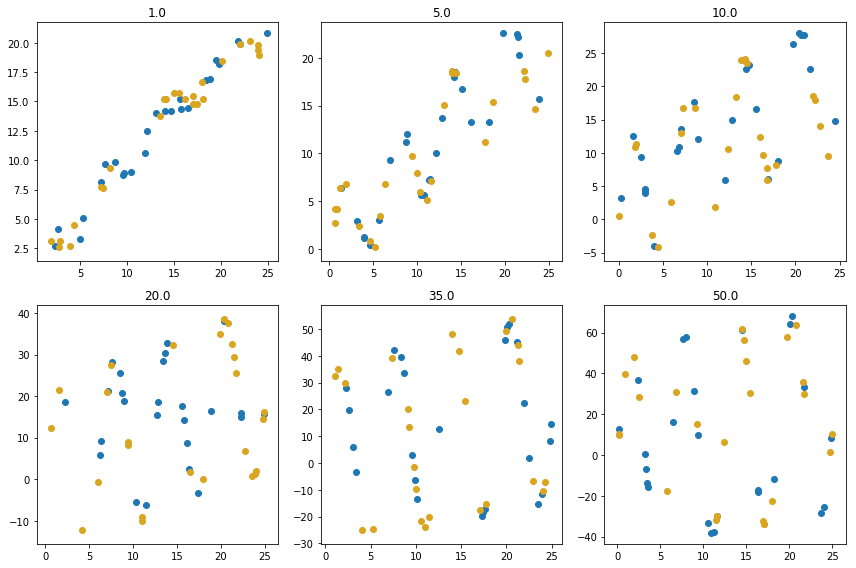

In [25]:
plt.figure(figsize=(12, 8))

for diff, number in zip((1., 5., 10., 20., 35., 50.), (1, 2, 3, 4, 5, 6)):
    plt.subplot(2, 3, number)
    plt.title(diff)
    _x, _y = generate_fake(difficulty=diff, obs_range=25)
    plt.scatter(_x, _y)
    _x, _y = generate_fake(difficulty=diff, obs_range=25)
    plt.scatter(_x, _y, c="goldenrod")

plt.tight_layout()
plt.show()

By generating a training and a validation set, we can test each model against each generated dataset.

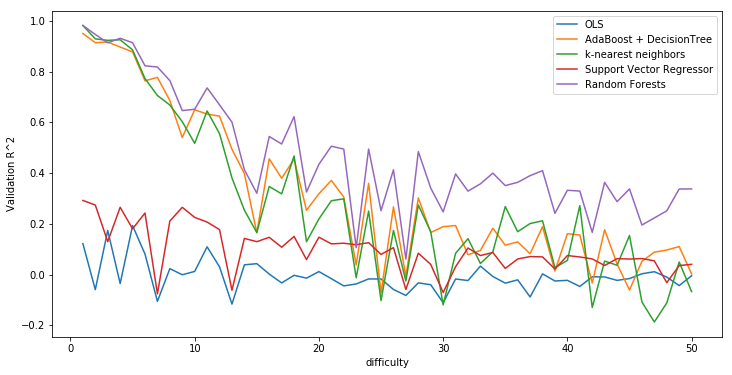

In [26]:
how_much = 50 + 1

plt.figure(figsize=(12, 6))
regressors = [LinearRegression(), 
              AdaBoostRegressor(n_estimators=100), 
              KNeighborsRegressor(n_neighbors=5), 
              SVR(), 
              RandomForestRegressor(n_estimators=100, max_depth=5)]

# Give them names for the legend
regressor_names = ["OLS", "AdaBoost + DecisionTree", "k-nearest neighbors", "Support Vector Regressor", "Random Forests"]

# Create storage for the results
regressor_results = {}
for key in regressor_names:
    regressor_results[key] = []

# Also give them colors
colors = ["g", "r", "c", "burlywood", "b"]

for diff in range(1, how_much):
    # Training data
    x_train, y_train = generate_fake(difficulty=diff, obs_range=100)

    # Validation data
    x_valid, y_valid = generate_fake(difficulty=diff, obs_range=100)

    # You can use the zip() function to iterate over multiple series
    for regressor, name in zip(regressors, regressor_names):
        _ = regressor
        # fit instance
        fit = _.fit(X=x_train, y=y_train)
        # predict using instance
        valid_predict = _.predict(X=x_valid)
        # R^2
        _score = r2_score(y_valid, valid_predict)
        regressor_results[name].append(_score)

for key in regressor_results:
    plt.plot(range(1, how_much), regressor_results[key], label=key)

plt.legend()
plt.xlabel("difficulty")
plt.ylabel("Validation R^2")
plt.show()

Hope this was useful. Leave feedback if you have any!